<a href="https://colab.research.google.com/github/danielroa98/Redes-Neuronales/blob/main/A01021960_cifar_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import cv2 #OpenCV

import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical

# Import the dataset that will be used
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

### Loading data from the Cifar10 dataset

In [111]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


(32, 32, 3)
[3]


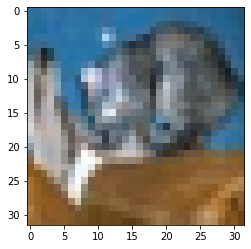

In [112]:
sample = 0
print(test_images[sample].shape)
print(test_labels[sample])

sampleImg = cv2.cvtColor(test_images[sample], cv2.COLOR_BGR2RGB)

plt.imshow(sampleImg, cmap='gray')
# plt.imshow(test_images[0], cmap='gray')

In [113]:
train_imgs_standard = train_images.reshape((50000, 32*32*3))
train_imgs_standard = train_imgs_standard.astype('float32')/255

test_imgs_standard = test_images.reshape((10000, 32*32*3))
test_imgs_standard = test_imgs_standard.astype('float32')/255

In [114]:
print(train_labels)
print(train_labels.shape)

train_labels_standard = to_categorical(train_labels)
test_labels_standard = to_categorical(test_labels)

print(train_labels_standard[0])
print(train_labels_standard.shape)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(50000, 10)


In [161]:
network = models.Sequential()

# Hidden layers
network.add(layers.Dense(32, activation='relu', input_shape=(3072,), name='Hidden_0'))
network.add(layers.Dense(64, activation='relu', name='Hidden_1'))
network.add(layers.Dense(128, activation='relu', name='Hidden_2'))
network.add(layers.Dense(256, activation='relu', name='Hidden_3'))
network.add(layers.Dense(300, activation='relu', name='Hidden_3.1'))
network.add(layers.Dense(450, activation='relu', name='Hidden_3.2'))
network.add(layers.Dense(512, activation='relu', name='Hidden_4'))
# network.add(layers.Dense(700, activation='relu', name='Hidden_5.1'))

# Output layer
network.add(layers.Dense(10, activation='softmax', name='Output'))

network.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

network.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_0 (Dense)             (None, 32)                98336     
_________________________________________________________________
Hidden_1 (Dense)             (None, 64)                2112      
_________________________________________________________________
Hidden_2 (Dense)             (None, 128)               8320      
_________________________________________________________________
Hidden_3 (Dense)             (None, 256)               33024     
_________________________________________________________________
Hidden_3.1 (Dense)           (None, 300)               77100     
_________________________________________________________________
Hidden_3.2 (Dense)           (None, 450)               135450    
_________________________________________________________________
Hidden_4 (Dense)             (None, 512)             

In [162]:
x_train = train_imgs_standard[:35000]
x_val = train_imgs_standard[35000:]

y_train = train_labels_standard[:35000]
y_val = train_labels_standard[35000:]

history = network.fit(x_train, y_train, epochs=25, validation_data=(x_val, y_val))

Epoch 1/25
1094/1094 [==============================] - 5s 4ms/step - loss: 1.9356 - accuracy: 0.2837 - val_loss: 1.8051 - val_accuracy: 0.3477
Epoch 2/25
1094/1094 [==============================] - 5s 4ms/step - loss: 1.7473 - accuracy: 0.3662 - val_loss: 1.7074 - val_accuracy: 0.3827
Epoch 3/25
1094/1094 [==============================] - 4s 4ms/step - loss: 1.6733 - accuracy: 0.3935 - val_loss: 1.6659 - val_accuracy: 0.4013
Epoch 4/25
1094/1094 [==============================] - 4s 4ms/step - loss: 1.6202 - accuracy: 0.4169 - val_loss: 1.6660 - val_accuracy: 0.3974
Epoch 5/25
1094/1094 [==============================] - 5s 4ms/step - loss: 1.5714 - accuracy: 0.4335 - val_loss: 1.6153 - val_accuracy: 0.4144
Epoch 6/25
1094/1094 [==============================] - 5s 4ms/step - loss: 1.5398 - accuracy: 0.4415 - val_loss: 1.5736 - val_accuracy: 0.4361
Epoch 7/25
1094/1094 [==============================] - 5s 4ms/step - loss: 1.5061 - accuracy: 0.4575 - val_loss: 1.5765 - val_accuracy:

In [163]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

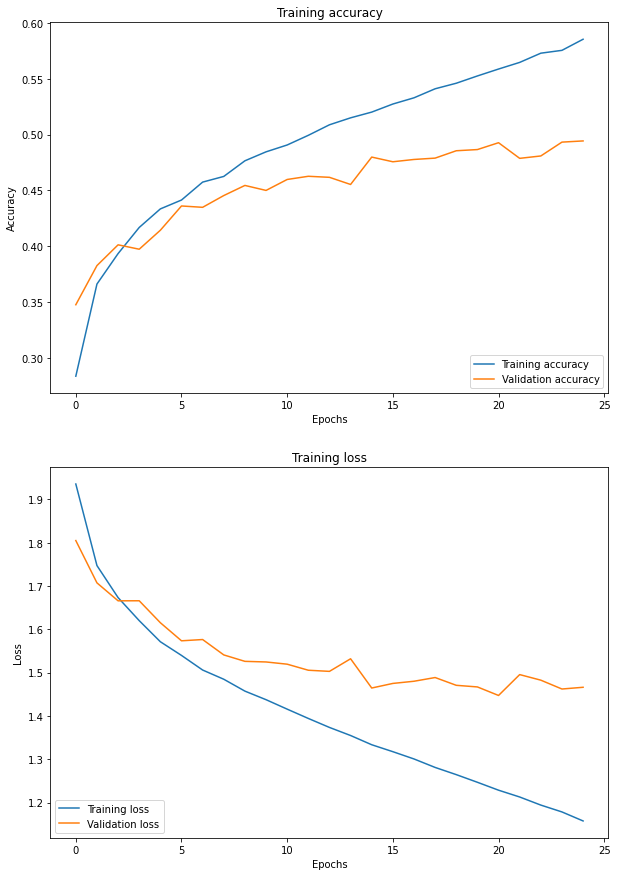

In [164]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')

In [165]:
test_results = network.evaluate(test_imgs_standard, test_labels_standard)
print(test_results)

313/313 [==============================] - 1s 3ms/step - loss: 1.4500 - accuracy: 0.4909
[1.4500229358673096, 0.4909000098705292]
